# Ex7 - Model Regularization in Practice, an example with Keras and TensorFlow 2.0

In this task, you are going to see the differences between applying regularization vs. not applying, in terms of model training on some dataset.
The dataset we will use is Iris flowers, a classic SKLearn dataset.

Inspired by [BindiChen](https://github.com/BindiChen)

In [1]:
# Relevant imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

## Exploring data

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preparing data for Keras and TensorFlow

In [4]:
# label -> one-hot encoding, doing so because we are in a classification problem
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [7]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


## 1. Build an unregularized neural network model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
    # TODO: Build the architecture below:
    # Sequential of:
    # Dense of 64 neurons, with input shape (4,), activation = relu
    # Dense of 128 neurons,activation = relu
    # Dense of 128 neurons,activation = relu
    # Dense of 128 neurons,activation = relu
    # Dense of 64 neurons, activation = relu
    # Dense of 64 neurons, activation = relu
    # Dense of 64 neurons, activation = relu
    # Dense of 3 neurons, activation = softmax for the classification task
    # TODO: make sure to return the model from that function
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

### Compile the model


In [11]:
model.compile(
    ### TODO: Compile with adam optimizer, categorical cross entropy loss, 'accuracy' as metric
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

### Fit the model to the training data

In [12]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.0561 - accuracy: 0.3778 - val_loss: 1.0726 - val_accuracy: 0.4333
Epoch 2/200
3/3 - 0s - loss: 0.9881 - accuracy: 0.5222 - val_loss: 0.9979 - val_accuracy: 0.3000
Epoch 3/200
3/3 - 0s - loss: 0.9215 - accuracy: 0.3667 - val_loss: 0.9293 - val_accuracy: 0.5667
Epoch 4/200
3/3 - 0s - loss: 0.8527 - accuracy: 0.4889 - val_loss: 0.8455 - val_accuracy: 0.7667
Epoch 5/200
3/3 - 0s - loss: 0.7774 - accuracy: 0.6222 - val_loss: 0.7325 - val_accuracy: 0.9000
Epoch 6/200
3/3 - 0s - loss: 0.6900 - accuracy: 0.8111 - val_loss: 0.6163 - val_accuracy: 0.8333
Epoch 7/200
3/3 - 0s - loss: 0.6357 - accuracy: 0.6444 - val_loss: 0.4924 - val_accuracy: 0.9000
Epoch 8/200
3/3 - 0s - loss: 0.5123 - accuracy: 0.8778 - val_loss: 0.4086 - val_accuracy: 0.9333
Epoch 9/200
3/3 - 0s - loss: 0.4410 - accuracy: 0.9333 - val_loss: 0.2898 - val_accuracy: 0.9333
Epoch 10/200
3/3 - 0s - loss: 0.3546 - accuracy: 0.9111 - val_loss: 0.2491 - val_accuracy: 0.9333
Epoch 11/200
3/3 - 0s - loss:

Epoch 85/200
3/3 - 0s - loss: 0.0777 - accuracy: 0.9667 - val_loss: 0.0491 - val_accuracy: 0.9667
Epoch 86/200
3/3 - 0s - loss: 0.0941 - accuracy: 0.9667 - val_loss: 0.0437 - val_accuracy: 1.0000
Epoch 87/200
3/3 - 0s - loss: 0.0742 - accuracy: 0.9667 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 88/200
3/3 - 0s - loss: 0.0750 - accuracy: 0.9667 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 89/200
3/3 - 0s - loss: 0.0741 - accuracy: 0.9667 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 90/200
3/3 - 0s - loss: 0.0738 - accuracy: 0.9778 - val_loss: 0.0402 - val_accuracy: 1.0000
Epoch 91/200
3/3 - 0s - loss: 0.0780 - accuracy: 0.9667 - val_loss: 0.0627 - val_accuracy: 0.9667
Epoch 92/200
3/3 - 0s - loss: 0.0991 - accuracy: 0.9667 - val_loss: 0.0604 - val_accuracy: 0.9667
Epoch 93/200
3/3 - 0s - loss: 0.0959 - accuracy: 0.9667 - val_loss: 0.1494 - val_accuracy: 0.9000
Epoch 94/200
3/3 - 0s - loss: 0.0996 - accuracy: 0.9667 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 95/200
3/3 - 0

Epoch 168/200
3/3 - 0s - loss: 0.0736 - accuracy: 0.9667 - val_loss: 0.0889 - val_accuracy: 0.9333
Epoch 169/200
3/3 - 0s - loss: 0.0873 - accuracy: 0.9778 - val_loss: 0.0497 - val_accuracy: 1.0000
Epoch 170/200
3/3 - 0s - loss: 0.0753 - accuracy: 0.9667 - val_loss: 0.0563 - val_accuracy: 0.9667
Epoch 171/200
3/3 - 0s - loss: 0.0801 - accuracy: 0.9667 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 172/200
3/3 - 0s - loss: 0.0600 - accuracy: 0.9889 - val_loss: 0.1453 - val_accuracy: 0.9333
Epoch 173/200
3/3 - 0s - loss: 0.0990 - accuracy: 0.9556 - val_loss: 0.0706 - val_accuracy: 0.9333
Epoch 174/200
3/3 - 0s - loss: 0.0674 - accuracy: 0.9778 - val_loss: 0.0294 - val_accuracy: 1.0000
Epoch 175/200
3/3 - 0s - loss: 0.0784 - accuracy: 0.9667 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 176/200
3/3 - 0s - loss: 0.0572 - accuracy: 0.9778 - val_loss: 0.2195 - val_accuracy: 0.9000
Epoch 177/200
3/3 - 0s - loss: 0.1130 - accuracy: 0.9556 - val_loss: 0.0504 - val_accuracy: 0.9667
Epoch 178/

### Model Evaluation

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

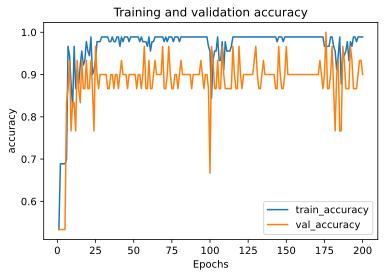

In [14]:
plot_metric(history, 'accuracy')
### TODO: Q: what is the name of this phenomena?
# A: overfitting

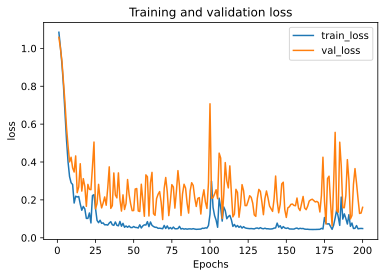

In [15]:
plot_metric(history, 'loss')

Plot the training and validation loss

Finally, let's plot the loss vs. epochs graph on the training and validation sets

From the graph, we can see that the model has vastly overfit the training data, so it outperform the validation set


In [16]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0119 - accuracy: 1.0000


[0.011928395368158817, 1.0]

## 2. Adding L2 regularization and Dropout

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def create_regularized_model(factor, rate):
    ### TODO:
    ### You should build the same model as above, but this time:
    # 1. Dropout layer, with rate should follow each Dense layer, except the last one (Dense of 3)
    # 2.factor should be the input of l2 regularization in each Dense layer
    # 3. Don't forget to return the model
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [18]:
# Re-build the model with weight decay and dropout layers
model = create_regularized_model(1e-5, 0.3)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                320       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

In [20]:
# Compile the model
model.compile(
    ### TODO: Compile with adam optimizer, categorical cross entropy loss, 'accuracy' as metric
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [21]:
# Train the model, with some of the data reserved for validation
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.1849 - accuracy: 0.2667 - val_loss: 1.0609 - val_accuracy: 0.4667
Epoch 2/200
3/3 - 0s - loss: 1.1342 - accuracy: 0.3333 - val_loss: 1.0672 - val_accuracy: 0.4667
Epoch 3/200
3/3 - 0s - loss: 1.1378 - accuracy: 0.3000 - val_loss: 1.0717 - val_accuracy: 0.4667
Epoch 4/200
3/3 - 0s - loss: 1.1026 - accuracy: 0.3222 - val_loss: 1.0824 - val_accuracy: 0.6000
Epoch 5/200
3/3 - 0s - loss: 1.1230 - accuracy: 0.3667 - val_loss: 1.0846 - val_accuracy: 0.5667
Epoch 6/200
3/3 - 0s - loss: 1.1060 - accuracy: 0.3778 - val_loss: 1.0789 - val_accuracy: 0.6667
Epoch 7/200
3/3 - 0s - loss: 1.1282 - accuracy: 0.3333 - val_loss: 1.0753 - val_accuracy: 0.5333
Epoch 8/200
3/3 - 0s - loss: 1.1017 - accuracy: 0.4000 - val_loss: 1.0734 - val_accuracy: 0.5333
Epoch 9/200
3/3 - 0s - loss: 1.0772 - accuracy: 0.3778 - val_loss: 1.0702 - val_accuracy: 0.5333
Epoch 10/200
3/3 - 0s - loss: 1.1098 - accuracy: 0.4333 - val_loss: 1.0609 - val_accuracy: 0.5333
Epoch 11/200
3/3 - 0s - loss:

Epoch 85/200
3/3 - 0s - loss: 0.3959 - accuracy: 0.7889 - val_loss: 0.5480 - val_accuracy: 0.8667
Epoch 86/200
3/3 - 0s - loss: 0.4369 - accuracy: 0.7667 - val_loss: 0.5440 - val_accuracy: 0.8667
Epoch 87/200
3/3 - 0s - loss: 0.4268 - accuracy: 0.7333 - val_loss: 0.5427 - val_accuracy: 0.9333
Epoch 88/200
3/3 - 0s - loss: 0.4006 - accuracy: 0.8111 - val_loss: 0.5413 - val_accuracy: 0.9333
Epoch 89/200
3/3 - 0s - loss: 0.3808 - accuracy: 0.8222 - val_loss: 0.5386 - val_accuracy: 0.9333
Epoch 90/200
3/3 - 0s - loss: 0.3931 - accuracy: 0.7667 - val_loss: 0.5343 - val_accuracy: 0.9333
Epoch 91/200
3/3 - 0s - loss: 0.4208 - accuracy: 0.7778 - val_loss: 0.5234 - val_accuracy: 0.8667
Epoch 92/200
3/3 - 0s - loss: 0.4186 - accuracy: 0.7667 - val_loss: 0.5091 - val_accuracy: 0.8000
Epoch 93/200
3/3 - 0s - loss: 0.4028 - accuracy: 0.7889 - val_loss: 0.5050 - val_accuracy: 0.8000
Epoch 94/200
3/3 - 0s - loss: 0.4523 - accuracy: 0.7889 - val_loss: 0.5050 - val_accuracy: 0.8667
Epoch 95/200
3/3 - 0

Epoch 168/200
3/3 - 0s - loss: 0.1487 - accuracy: 0.9333 - val_loss: 0.1457 - val_accuracy: 0.9333
Epoch 169/200
3/3 - 0s - loss: 0.1916 - accuracy: 0.9222 - val_loss: 0.1346 - val_accuracy: 1.0000
Epoch 170/200
3/3 - 0s - loss: 0.1884 - accuracy: 0.9333 - val_loss: 0.1750 - val_accuracy: 0.9000
Epoch 171/200
3/3 - 0s - loss: 0.0968 - accuracy: 0.9667 - val_loss: 0.2330 - val_accuracy: 0.8667
Epoch 172/200
3/3 - 0s - loss: 0.1412 - accuracy: 0.9222 - val_loss: 0.2778 - val_accuracy: 0.8667
Epoch 173/200
3/3 - 0s - loss: 0.1979 - accuracy: 0.9000 - val_loss: 0.2148 - val_accuracy: 0.8667
Epoch 174/200
3/3 - 0s - loss: 0.1065 - accuracy: 0.9667 - val_loss: 0.1360 - val_accuracy: 0.9333
Epoch 175/200
3/3 - 0s - loss: 0.2779 - accuracy: 0.9222 - val_loss: 0.1223 - val_accuracy: 0.9333
Epoch 176/200
3/3 - 0s - loss: 0.0940 - accuracy: 0.9667 - val_loss: 0.1240 - val_accuracy: 0.9333
Epoch 177/200
3/3 - 0s - loss: 0.1321 - accuracy: 0.9556 - val_loss: 0.1299 - val_accuracy: 0.9333
Epoch 178/

### Plot the learning curves

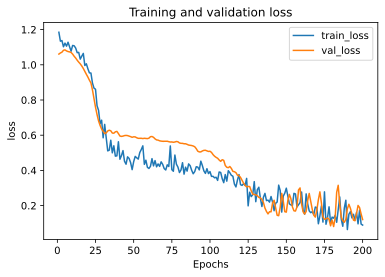

In [22]:
plot_metric(history, 'loss')

Here, you can see that the overfitting is not completely fixed, but there is a signficant improvement when we compare it to the unregularized model

In [23]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0424 - accuracy: 1.0000


[0.042396124452352524, 1.0]

In [25]:
!pip freeze | grep tensorflow

tensorflow==2.5.0
tensorflow-docs===0.0.047a807024a49d648ff635434d49e3f03a8cfc57a-
tensorflow-estimator==2.5.0


## That's it

Now you can see how regularization can be used and will help within the mentioned phenomena, which we discussed in class.